#### CMSE 202 Final Project
### &#9989; Chris Brown, Kewalin Samart, Jay Scott, Raymond Smith
### &#9989; Section_003
#### &#9989; 4/13/21

# ___Modeling Oxygen Repopulation in Blood Cells___

## Background and Motivation

__**__

## Methodology

In [42]:
import numpy as np
import pandas as pd
import math
import random
from IPython.display import display, clear_output
import time
import matplotlib.pyplot as plt
%matplotlib inline

### Pseudocode

__*Focusing on modeling blood moving through veins/arteries. Possibly model a smaller process, oxygen from lungs to blood*__

1) Initialize a board- Put oxygen, blood cells, and organs on the board. Veins/arteries represented by straight line boundaries on board. Put veins and arteries on the board with junctions. Organs should occupy multiple grid points and be initialized containing CO2

2) Use classes to represent oxygen, blood cell/hemoglobin, and organs.

    Attributes/Methods
    
    Oxygen; Able to be transferred from blood to organs. (For smaller model)Oxygen is able to diffuse from lungs to blood stream. Oxygen randomly appears every few time steps to represent breathing. Most oxygen must be carried by blood cells/hemoglobin. A percentage of oxygen dissolves/diffuses into plasma which contains blood cells. 3% of oxygen will be randomly chosen to move randomly through plasma alongside blood cells.
    
    Blood Cells/Hemoglobin; Randomly assign blood cells at start to have oxygen or CO2. Blood cells have two different states, full of oxygen and full of CO2. Moves radomly through veins and arteries, at junctions we can set different probabilities for which path a blood cell might take. Blood cells check every grid point around them (nearest neighbor function) for vein/artery paths. Blood cells carrying CO2 only travel through veins and cells carrying oxygen only travel through arteries.
    
    Organs; Organs contain CO2 when initialized with the board. Absorb oxygen and create CO2. When oxygen reaches an organ it is turned into CO2 and leaves the organ. When CO2 reaches the lungs we somehow show it being expelled from the body (it disappears from the model)



### Actual Code

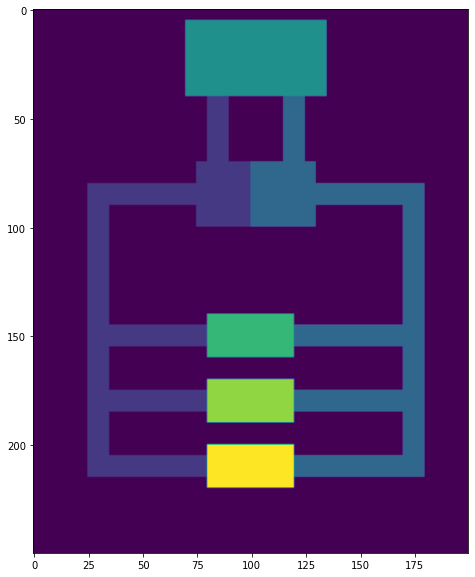

In [52]:
board = np.zeros(shape = (250,200)) # Initializing a 250 by 200 size board of color purple

# heart
board[70:100,75:100] = 1 # left part of the heart (low oxygen; blue)
board[70:100,100:130] = 2 # right part of the heart (high oxygen; teal; anatomically bigger than the left part)

# lung 
board[5:40,70:135] = 3

# organ no.1 
board[140:160,80:120] = 4

# organ no.2
board[170:190,80:120] = 5

# organ no.3
board[200:220,80:120] = 6

# veins; blue
board[40:70,80:90] = 1 # vein connecting lung and left part of the heart
board[80:90,25:75] = 1 # top vein connecting lung with organs
board[90:215,25:35] = 1 # side vein connecting lung with organs
board[145:155,35:80] = 1 # side vein organ no.1
board[175:185,35:80] = 1 # side vein organ no.2
board[205:215,35:80] = 1 # side vein organ no.3

# arteries; teal
board[40:70,115:125] = 2 # artery connecting lung and right part of the heart
board[80:90,130:180] = 2 # top artery connecting lung with organs
board[90:215,170:180] = 2 # side artery connecting lung with organs
board[145:155,120:170] = 2 # side artery organ no.1
board[175:185,120:170] = 2 # side artery organ no.2
board[205:215,120:170] = 2 # side artery organ no.3

# plotting the board
plt.figure(figsize=(20,10))
plt.imshow(board) 

In [53]:
class oxygen():
    
    def __init__ (self, artery_locationx = 120, artery_locationy = 40):
        
        '''
        Intializing the oxygen object and its location 
        '''
        
        self.x = artery_locationx #location to be drawn 
        self.y = artery_locationy #location to be drawn 
    
        o_x = self.x 
        o_y = self.y 
        
    def enter_blood(self):
        
        '''
        3% of Oxygen is diffused/dissolved into plasma within blood 
        This is shown through an oxygen object being drawn within the arteries
        '''
        prob = random.random()
        if prob > 0.97:
            plt.scatter(self.x, self.y, c='aqua') #plots blue marker 'oxygen' on board at artery location
            
    def draw(self):
        
        '''
        Draws the oxygen object on the board 
        '''
        
        plt.scatter(self.x, self.y, c='aqua')

    def movement_down(self):
        
        '''
        Oxygen moves through the arteries towards organs
        This is shown through the oxygen object moving 1 unit downwards
        '''
        o_dy = 1
        
        o_x = self.x 
        o_y = self.y + o_dy 
        
        self.x = o_x #oxygen coordinates update after it moves 
        self.y = o_y   
        
    def movement_right(self):
        
        '''
        Oxygen moves through the arteries towards organs  
        This is shown through the oxygen object moving 1 unit to the right 
        '''
        
        o_dx = 1 
        
        o_x = self.x + o_dx
        o_y = self.y 
        
        self.x = o_x #oxygen coordinates update after it moves 
        self.y = o_y      
        
    def movement_left(self):
        
        '''
        Oxygen moves through the arteries towards organs 
        This is shown through the oxygen object moving 1 unit to the left 
        '''
        
        o_dx = 1
        
        o_x = self.x - o_dx
        o_y = self.y 
        
        self.x = o_x #oxygen coordinates update after it moves 
        self.y = o_y      

    def board_location(self):
        
        '''
        Provides the current location of the oxygen object on the board
        '''
        
        return self.x, self.y 
    
    def distance (self, organ_locationx, organ_locationy): 
        
        '''
        Provides distance between oxygen object and inputed organ location
        '''
    
        distance = ((organ_locationx - self.x)**2) + ((organ_locationy - self.y)**2) 
        #distance formula, using organ and current oxygen molecule location 
        return distance



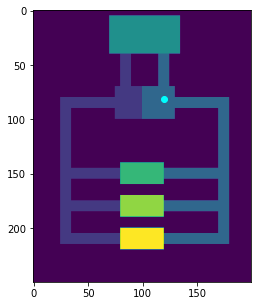

In [ ]:
o = oxygen()
o.enter_blood()
plt.imshow(board)

fig, ax = plt.subplots(figsize=(10,5))

for _ in range(400):
  
    '''
    Oxygen Object Movement
    '''
    
    location = o.board_location()
    if location[1] < 85:
        o.movement_down()
        o.draw()
    elif location[0] < 175 and location[1] == 85:
        o.movement_right()
        o.draw()
    elif location[0] == 175 and location[1] < 150: 
        o.movement_down()
        o.draw()
    elif location[0] == 175 and location[1] == 150: #Potentially enter organ 1
        prob = random.random()
        if prob > 0.33:
            o.movement_down()
            o.draw()
        else:
            o.movement_left()
            o.draw()
    elif location[1] == 150:
        d = o.distance(115,150)
        if d < 3:
            del o
        else: 
            o.movement_left()
            o.draw()
    elif location[1] < 180: #Potentially enter organ 2 
            o.movement_down()
            o.draw()
    elif location[0] == 175 and location[1] == 180:
        prob = random.random()
        if prob > 0.33:
            o.movement_down()
            o.draw()
        else:
            o.movement_left()
            o.draw()
    elif location[1] == 180:
        d = o.distance(115,180)
        if d < 3:
            del o
        else: 
            o.movement_left()
            o.draw()
    elif location[1] < 210: #Potentially enter organ 3 
        o.movement_down()
        o.draw()
    elif location[1] == 210:
        d = o.distance(115,210)
        if d < 3:
            del o
        else: 
            o.movement_left()
            o.draw()
    



            
        
            
    
# Animaiton part (dosn't change)
    plt.imshow(board)
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots
    time.sleep(0.0001)      # Sleep for a fraction of a second to allow animation to catch up
  # Sleep for a fraction of a second to allow animation to catch up

   